# Random Forest Algorithm

The **Random Forest** algorithm is a popular ensemble machine learning technique. It works by building a collection of decision trees during training and outputting the class that is the majority class for classification or the average for regression tasks. The key idea behind Random Forest is to combine multiple decision trees to improve model accuracy and reduce the risk of overfitting that can occur with a single decision tree.

#### Key Concepts:
1. **Ensemble Learning**: The process of combining several models to solve a problem and improve performance.
2. **Decision Trees**: A decision tree is a flowchart-like structure where each internal node represents a "test" or "decision" on an attribute, each branch represents the outcome of the test, and each leaf node represents the final outcome (class or value).
3. **Bootstrap Aggregating (Bagging)**: Random Forest uses a method called "bagging," where it builds several decision trees on random subsets of the training data (with replacement).
4. **Random Feature Selection**: When splitting a node in each tree, Random Forest randomly selects a subset of features rather than considering all features, reducing the correlation between trees.


In [1]:
%pip install scikit-learn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Decision Tree

A **decision tree** is a simple yet powerful machine learning model that splits data into subsets based on feature values. It is constructed by dividing the dataset at each node based on the feature that best separates the data. The process continues recursively until it reaches a stopping condition (e.g., depth of the tree, minimum samples per leaf). 

There are two main types of decision trees:
1. **Classification Tree**: Used when the target variable is categorical (e.g., class labels like `Yes` or `No`).
2. **Regression Tree**: Used when the target variable is continuous (e.g., predicting numerical values like salary).




### Decision Tree for Classification

In a classification problem, the decision tree splits the data into classes by choosing the feature that best separates the classes at each node.

#### Example: Classification Decision Tree (Predicting whether a person will buy a product)
Let's consider a simple dataset with features such as `Age`, `Income`, and `Education Level`, and the target variable is `Buy`, which can take values `Yes` or `No`.

#### Steps for Building a Classification Tree:
1. **Start with the entire dataset**.
2. **Split the dataset**: Choose the feature that best separates the data based on some criterion like **Gini Impurity** or **Entropy** (for classification).
   - For example, the feature `Income` might split the data into `Income < 50k` and `Income >= 50k`.
3. **Recursively split**: Continue splitting the subsets at each node based on the feature that maximizes class separation.
   - At each node, if we can’t split further (e.g., all data points are in the same class or a stopping condition is met), we assign the most frequent class label in the subset to that leaf node.

#### Example Process:
Consider a small example dataset with three features (`Age`, `Income`, `Education`) and the target (`Buy`):

| Age  | Income | Education | Buy  |
|------|--------|-----------|------|
| 25   | 40k    | Highschool| No   |
| 35   | 60k    | College   | Yes  |
| 50   | 90k    | PhD       | Yes  |
| 23   | 45k    | Highschool| No   |
| 40   | 80k    | College   | Yes  |

The decision tree algorithm will select features and split them based on their ability to reduce **impurity** (using metrics like **Gini impurity** or **entropy**). Let's say the tree first splits on **Income**:

- For `Income < 50k`: We classify the `Buy` as `No` (majority class).
- For `Income >= 50k`: The tree further splits based on **Education**.

##### Example of the resulting decision tree:
```scss
                [Income >= 50k]
                /       \
            Yes          No
         (Buy = Yes)   (Buy = No)
```

In [2]:
# Decision Tree for Classification Code Example:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Example dataset
X = [[25, 40], [35, 60], [50, 90], [23, 45], [40, 80]]  # Features: Age, Income
y = ['No', 'Yes', 'Yes', 'No', 'Yes']  # Target: Buy (Yes/No)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print prediction
print(f"Predictions: {y_pred}")
print(f"Actual: {y_test}")


Predictions: ['No']
Actual: ['Yes']


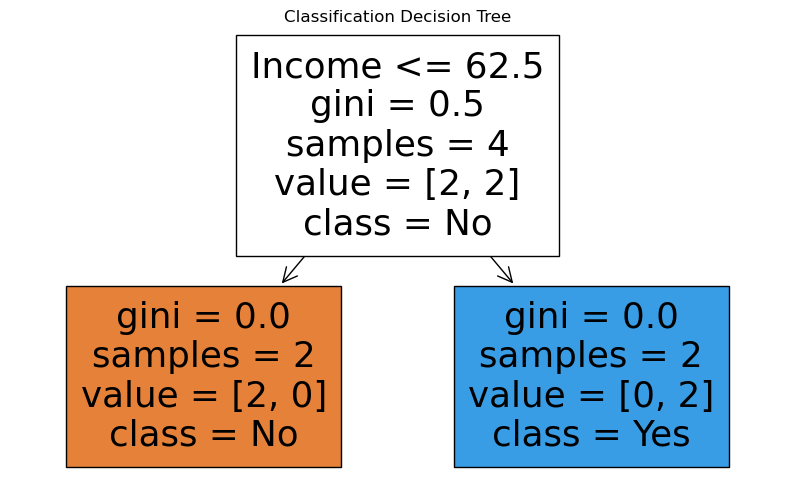

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=["Age", "Income"], class_names=clf.classes_)
plt.title("Classification Decision Tree")
plt.show()

### Decision Tree for Regression

In regression, the goal is to predict a continuous target variable. The tree splits the data at each node to minimize the **mean squared error (MSE)** between the predicted and actual values.

#### Example: Regression Decision Tree (Predicting Salary)
Consider a dataset where we have `Years of Experience` and `Age` as features, and the target variable is `Salary`, a continuous variable.

#### Steps for Building a Regression Tree:
1. **Start with the entire dataset**.
2. **Split the data**: Choose the feature that minimizes the error (e.g., MSE) at each node.
3. **Recursively split**: Continue splitting the data at each node, minimizing the prediction error, until a stopping criterion is met.
4. **Leaf nodes**: In regression, each leaf node contains a predicted value (usually the mean of the target variable values in that leaf).

#### Example Process:
Consider a small dataset with `Years of Experience`, `Age`, and `Salary`:

| Years of Experience | Age  | Salary  |
|---------------------|------|---------|
| 1                   | 25   | 40,000  |
| 5                   | 30   | 60,000  |
| 10                  | 40   | 80,000  |
| 2                   | 26   | 45,000  |
| 7                   | 35   | 70,000  |

The decision tree algorithm will select features and split them to reduce the prediction error. For example, it may split based on `Years of Experience`:

- For `Years of Experience < 4`: Predicted salary might be the average salary of 40k and 45k, say `42,500`.
- For `Years of Experience >= 4`: The prediction would be based on the other data points, such as 60k and 70k, and so on.

##### Example of the resulting decision tree:

```scss
                    [Years of Experience >= 4]
                    /            \
            Predicted Salary  Predicted Salary
            (65,000)            (80,000)
```


In [4]:
# Decision Tree for Regression Code Example:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset
X = [[1, 25], [5, 30], [10, 40], [2, 26], [7, 35]]  # Features: Years of Experience, Age
y = [40000, 60000, 80000, 45000, 70000]  # Target: Salary

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Print prediction
print(f"Predictions: {y_pred}")
print(f"Actual: {y_test}")


Predictions: [70000.]
Actual: [60000]


### Plotting the decision trees of classifier and regressor models from above example

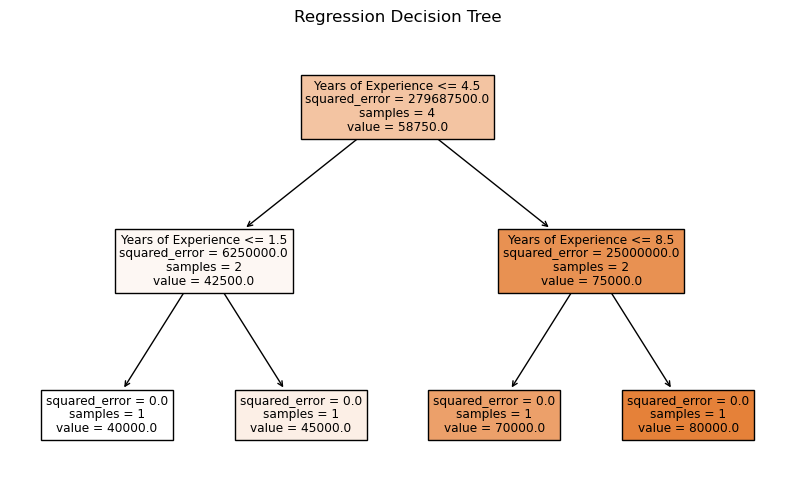

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(regressor, filled=True, feature_names=["Years of Experience", "Age"])
plt.title("Regression Decision Tree")
plt.show()


### Key Points About Individual Decision Trees:
- **Classification Trees**: The goal is to assign a class label to a data point based on the majority class in the leaf node.
- **Regression Trees**: The goal is to predict a continuous value based on the mean of the target variable in the leaf node.
- **Splitting Criteria**: For classification, the tree uses **impurity** measures like **Gini impurity** or **entropy**. For regression, it uses **variance reduction** or **mean squared error (MSE)** to select the best splits.

### Advantages and Disadvantages of Decision Trees:
**Advantages**:
- Simple and interpretable.
- No need for feature scaling.
- Can handle both numerical and categorical data.

**Disadvantages**:
- Prone to overfitting, especially with deep trees.
- Can be unstable, as small changes in the data can lead to a completely different tree.

When using **Random Forest**, multiple decision trees are trained, and the predictions are aggregated to overcome the limitations of a single decision tree, like overfitting.

## Random Forest for Classification and Regression

Random Forest can be used for both **classification** and **regression** tasks, and the process of building the model is similar in both cases, with the primary difference lying in the type of output (class or continuous value).

### 1. Random Forest for Classification

In **classification**, the goal is to predict a class label based on input features. Each decision tree in the random forest predicts a class label for an input, and the final output is the class that has the majority vote from all the trees.

#### Example:
Suppose we have a dataset with features such as age, income, and education level, and we want to predict whether a person will buy a product (`Buy = Yes` or `Buy = No`).

##### Steps:
1. **Data Preparation**: Split the data into training and testing datasets.
2. **Building Trees**:
   - Randomly select a subset of training data with replacement (bootstrapping).
   - For each subset, train a decision tree by selecting a random subset of features at each node.
   - Continue splitting until the tree reaches a stopping criterion (e.g., max depth, minimum samples).
3. **Prediction**:
   - Each tree in the forest predicts a class label (e.g., `Yes` or `No`).
   - The final prediction is determined by **majority voting** among all the trees.

##### Example Process:
For a test sample, assume 3 trees predict the following:
- Tree 1: `Yes`
- Tree 2: `No`
- Tree 3: `Yes`

The final prediction is `Yes`, since the majority of trees voted for `Yes`.

In [6]:

## Code Example for Classification:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


<Axes: >

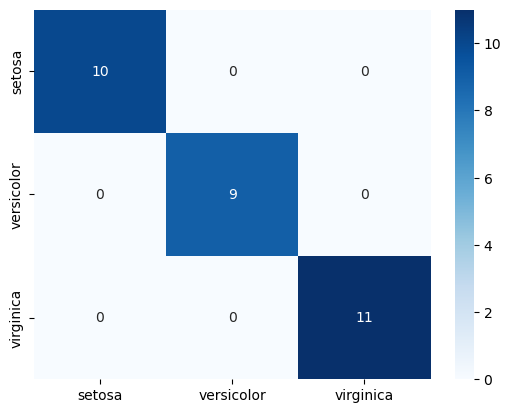

In [7]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)


### 2. Random Forest for Regression

In **regression**, the goal is to predict a continuous value. Each decision tree in the random forest predicts a continuous value, and the final output is the **average** of all the predictions made by the trees.

#### Example:
Suppose we have a dataset with features like years of experience, education level, and age, and we want to predict the salary of an individual.

##### Steps:
1. **Data Preparation**: Split the data into training and testing datasets.
2. **Building Trees**:
   - Randomly select a subset of training data with replacement.
   - For each subset, train a decision tree that predicts a continuous value.
   - Continue splitting until the tree reaches a stopping criterion.
3. **Prediction**:
   - Each tree in the forest predicts a continuous value for the input.
   - The final prediction is the **average** of all tree predictions.

##### Example Process:
For a test sample, assume 3 trees predict the following:
- Tree 1: 50,000
- Tree 2: 52,000
- Tree 3: 51,000

The final prediction is the average: `(50,000 + 52,000 + 51,000) / 3 = 51,000`.


In [8]:
# Code Example for Regression:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Create a regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"R-squared: {score}")


R-squared: 0.9785209935874235


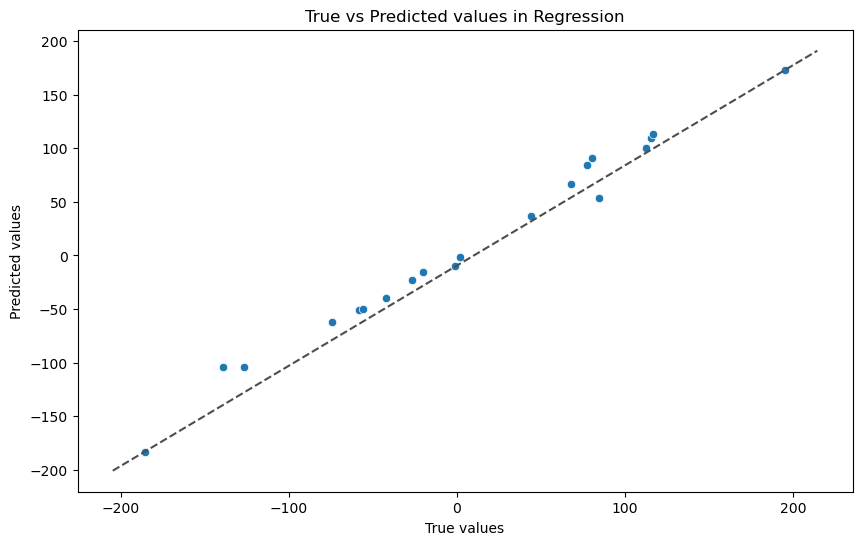

In [9]:
# Plot the predictions using seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values in Regression")

# draw a diagonal line
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")

plt.show()


### Training Process of Random Forest

1. **Bootstrap Sampling**: 
   - For each tree, a random sample of data points is selected (with replacement) from the training dataset. This sample is called a **bootstrap sample**.
   - Some points in the original dataset might not be selected (called "out-of-bag" samples).

2. **Building Decision Trees**:
   - For each bootstrap sample, a decision tree is built. The key difference from a single decision tree is that, at each node, a **random subset of features** is considered for splitting. This helps ensure that the trees are diverse.

3. **Prediction**:
   - For classification, each tree makes a class prediction, and the majority vote across trees is used for the final classification.
   - For regression, each tree makes a numeric prediction, and the average of all tree predictions is used for the final prediction.

4. **Out-of-Bag (OOB) Error Estimation**: 
   - The data points that were not included in the bootstrap sample are used to test the model (these are called "out-of-bag" samples). This provides an internal way to estimate the model's performance without needing a separate validation set.

### Advantages of Random Forest:
1. **High Accuracy**: It often performs well due to the aggregation of multiple decision trees.
2. **Robust to Overfitting**: Random Forest is less prone to overfitting than individual decision trees, especially when there are a large number of trees.
3. **Handles Missing Data**: It can handle missing data by averaging the results or using surrogate splits.
4. **Versatile**: Can be used for both classification and regression tasks.

### Disadvantages:
1. **Complexity**: Random Forest models can be computationally expensive and difficult to interpret compared to a single decision tree.
2. **Memory Consumption**: Storing multiple trees can require a significant amount of memory.

### Conclusion:
Random Forest is a powerful, flexible, and easy-to-use machine learning algorithm. It combines the strengths of decision trees (simple to interpret) and ensemble learning (better generalization and robustness). It’s widely used for both classification and regression tasks in real-world scenarios.